In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

import pandas as pd
pd.set_option('display.max_columns', False)

import joblib
import warnings
warnings.filterwarnings('ignore')

# Data Prep

In [130]:
metadata = pd.read_excel('Metadata.xlsx', header = 1)

In [131]:
metadata.iloc[:26]

,Variable,Position,Label
0,PSTV01,1.0,Nomor peserta
1,PSTV02,2.0,Nomor keluarga
2,PSTV15,3.0,Bobot
3,FKP02,4.0,ID Kunjungan FKTP
4,FKP03,5.0,Tanggal datang kunjungan FKTP
5,FKP04,6.0,Tanggal pulang kunjungan FKTP
6,FKP05,7.0,Provinsi FKTP
7,FKP06,8.0,Kabupaten/Kota FKTP
8,FKP07,9.0,Kepemilikan FKTP
9,FKP08,10.0,Jenis FKTP


In [132]:
columns = metadata.iloc[:26,0].values

In [133]:
df = pd.read_table('train_fktp.txt', sep=',', header=None, 
                   names=columns, parse_dates=['FKP03', 'FKP04'])
df.head()

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,4,1,12.0,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,2,1,1.0,4,773,K29,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,1,1,3.0,4,1757,Z30,Z309,"Contraceptive management, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,4,1,1.0,5,621,I10,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,Belum_Sehat
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,4,1,1.0,1,622,I11,I110,Hypertensive heart disease with (congestive) h...,98,9998,98,98,98,98,1,Belum_Sehat


In [134]:
df.tail()

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
4056893,212666736.0,91270403,14.246229,1285820875,2020-07-29,2020-07-29,35,3505,9,3,2,1,12.0,4,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat
4056894,30859241.0,30859241,3.886934,315641120P000514,2020-11-14,2020-11-14,35,3514,9,2,1,1,1.0,5,561,H26,H269,"Cataract, unspecified",35,3514,9,2,14,99,1,Belum_Sehat
4056895,8859416.0,8859416,6.146070,962412926,2019-08-16,2019-08-16,11,1171,4,2,1,1,13.0,5,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat
4056896,399491834.0,399491834,26.548826,273170420P000003,2020-04-01,2020-04-01,74,7402,3,1,3,1,1.0,2,774,K30,K30,Dyspepsia,98,9998,98,98,98,98,1,Belum_Sehat
4056897,99146724.0,39321920,88.348953,1188955927,2020-03-14,2020-03-14,73,7317,3,1,4,1,13.0,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,Sehat


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056898 entries, 0 to 4056897
Data columns (total 26 columns):
 #   Column      Dtype         
---  ------      -----         
 0   PSTV01      float64       
 1   PSTV02      int64         
 2   PSTV15      float64       
 3   FKP02       object        
 4   FKP03       datetime64[ns]
 5   FKP04       datetime64[ns]
 6   FKP05       int64         
 7   FKP06       int64         
 8   FKP07       int64         
 9   FKP08       int64         
 10  FKP09       int64         
 11  FKP10       int64         
 12  FKP11       float64       
 13  FKP12       int64         
 14  FKP14       int64         
 15  FKP14A      object        
 16  FKP15       object        
 17  FKP15A      object        
 18  FKP16       int64         
 19  FKP17       int64         
 20  FKP18       int64         
 21  FKP19       int64         
 22  FKP20       int64         
 23  FKP21       int64         
 24  FKP22       int64         
 25  FKP13Class  object

In [136]:
def plot_null(df):
  plt.figure(figsize=(20,5))
  ax = sns.barplot(x=df.isna().sum().sort_values().index, 
                   y=df.isna().sum().sort_values().values)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.bar_label(ax.containers[0])
  plt.show()

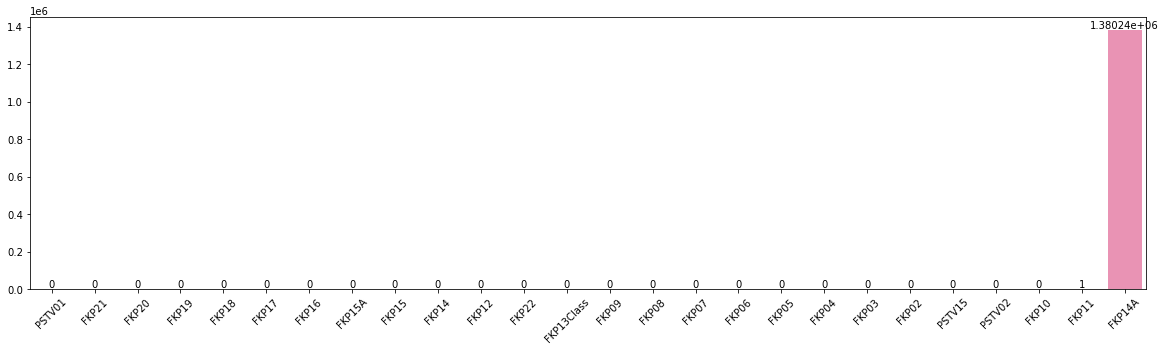

In [137]:
plot_null(df)

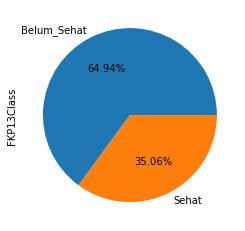

In [138]:
df.FKP13Class.value_counts().plot.pie(autopct='%.2f%%')
plt.show()

In [139]:
df_kumpul = pd.read_table('test_fktp.txt', sep=',', header=None, 
                        names=columns[:-1], parse_dates=['FKP03', 'FKP04'])
df_kumpul.head(3)

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22
0,187883292.0,98048784,240.884842,954386050,2019-08-21,2019-08-21,31,3172,9,2,1,1,13,5,9999,NaN,9999,9999,98,9998,98,98,98,98,2
1,123307139.0,20969999,47.378571,774246805,2019-02-12,2019-02-12,17,1705,3,1,3,1,12,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2
2,21416273.0,21416273,5.882927,1202010273,2020-03-27,2020-03-27,64,6402,3,1,4,1,13,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2


In [140]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
label_enc.fit(df[['FKP13Class']].values)
df.loc[:, 'FKP13Class'] = label_enc.transform(df[['FKP13Class']].values)
df.head()

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,4,1,12.0,2,9999,NaN,9999,9999,98,9998,98,98,98,98,2,1
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,2,1,1.0,4,773,K29,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,0
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,1,1,3.0,4,1757,Z30,Z309,"Contraceptive management, unspecified",98,9998,98,98,98,98,1,0
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,4,1,1.0,5,621,I10,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,0
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,4,1,1.0,1,622,I11,I110,Hypertensive heart disease with (congestive) h...,98,9998,98,98,98,98,1,0


# Data Cleaning

BUAT CLEANING
1. drop PSTV smua
1. drop kabupaten/kota (FKP06 FKP17)
2. drop kode dan nama icd10 (FKP14)
3. drop FKP15 FKP15A
4. isi null FKP11 ama modus
5. isi null FKP14A modus/"-"

FEAT ENG
1. pisahin FKP14A
2. bikin grup romawi FKP14A
3. bikin fitur lamarawat

In [141]:
df.drop(['PSTV01', 'PSTV02',
        'FKP14', 'FKP15', 'FKP15A'], axis=1, inplace=True)

In [142]:
df_kumpul.drop(['PSTV01', 'PSTV02',
              'FKP14', 'FKP15', 'FKP15A'], axis=1, inplace=True)

In [143]:
df_train, df_test = train_test_split(df, test_size=.2, stratify=df.FKP13Class.values, random_state=42)
df_train.shape, df_test.shape

((3245518, 21), (811380, 21))

In [144]:
df_train[df_train['FKP11'].isna()]

,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
1048800,184.99704,1237961348,2020-05-20,2020-05-20,35,3509,3,1,4,1,NaN,3,NaN,98,9998,98,98,98,98,2,1


In [145]:
df_train.loc[(df_train['FKP14A'].isna()), 'FKP11'].value_counts()

13.0    688293
12.0    399856
28.0     10824
1.0       1635
18.0      1283
17.0      1183
20.0       579
19.0       333
21.0       122
3.0         26
2.0         10
14.0         4
7.0          3
5.0          2
Name: FKP11, dtype: int64

In [146]:
df_train.loc[df_train['FKP11'].isna(), 'FKP11'] = 13.0

In [147]:
df_test[df_test['FKP11'].isna()]

,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class


In [148]:
df_kumpul[df_kumpul['FKP11'].isna()]

,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22


In [149]:
df_test.loc[df_test['FKP11'].isna(), 'FKP11'] = 13.0
df_kumpul.loc[df_kumpul['FKP11'].isna(), 'FKP11'] = 13.0

In [150]:
df_train.loc[df_train['FKP14A'].isna(), 'FKP14A'] = '999'

In [151]:
df_test.loc[df_test['FKP14A'].isna(), 'FKP14A'] = '999'
df_kumpul.loc[df_kumpul['FKP14A'].isna(), 'FKP14A'] = '999'

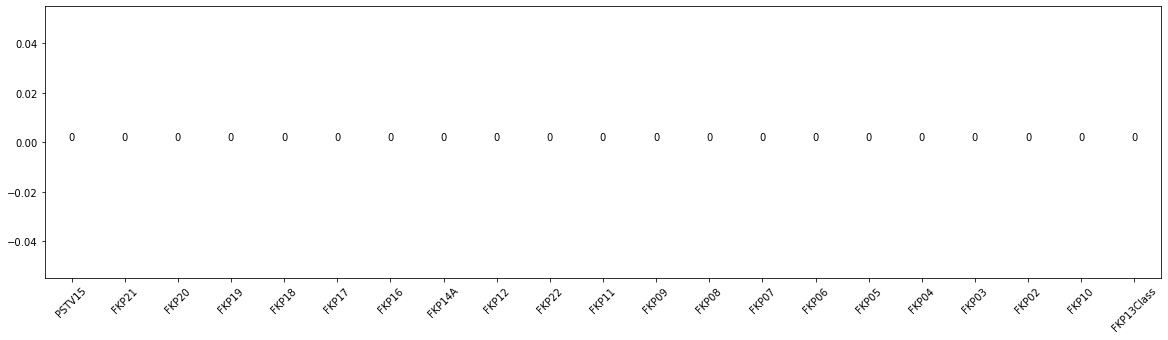

In [152]:
plot_null(df_train)

In [153]:
df['FKP21'].value_counts()

98    3677528
99     379370
Name: FKP21, dtype: int64

In [154]:
df_train.drop('FKP21', axis=1, inplace=True)
df_test.drop('FKP21', axis=1, inplace=True)
df_kumpul.drop('FKP21', axis=1, inplace=True)

In [155]:
df_train.select_dtypes('O').columns

Index(['FKP02', 'FKP14A'], dtype='object')

In [156]:
df_train['FKP14A'] = df_train['FKP14A'].str.strip()
df_train['FKP14A'] = df_train['FKP14A'].str.upper()

df_test['FKP14A'] = df_test['FKP14A'].str.strip()
df_test['FKP14A'] = df_test['FKP14A'].str.upper()

df_kumpul['FKP14A'] = df_kumpul['FKP14A'].str.strip()
df_kumpul['FKP14A'] = df_kumpul['FKP14A'].str.upper()

In [157]:
df_kumpul.head()

,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22
0,240.884842,954386050,2019-08-21,2019-08-21,31,3172,9,2,1,1,13,5,999,98,9998,98,98,98,2
1,47.378571,774246805,2019-02-12,2019-02-12,17,1705,3,1,3,1,12,2,999,98,9998,98,98,98,2
2,5.882927,1202010273,2020-03-27,2020-03-27,64,6402,3,1,4,1,13,2,999,98,9998,98,98,98,2
3,172.916031,1286640248,2020-07-30,2020-07-30,18,1872,9,2,5,1,13,5,999,98,9998,98,98,98,2
4,187.203140,1285179242,2020-07-28,2020-07-28,18,1809,9,2,5,1,13,2,999,98,9998,98,98,98,2


# Feature Engineering

In [158]:
df_train.loc[df_train['FKP13Class'] == 1, ['FKP02', 'FKP13Class']].sample(10)

,FKP02,FKP13Class
2339906,782092817,1
2167381,914626594,1
2856325,1375254749,1
2790908,1183237918,1
2090645,762207111,1
2786537,1201765393,1
2865197,989323880,1
1228427,829550252,1
1421614,1110623843,1
757393,802184836,1


In [159]:
df_train.loc[df_train['FKP13Class'] == 0, ['FKP02', 'FKP13Class']].sample(10)

,FKP02,FKP13Class
1729521,18791219P000437,0
2246214,271151020Y000948,0
3099782,349641119P000914,0
1968613,476470220P000011,0
1983917,83851020P000230,0
1985356,365220119P000010,0
1682872,334100519P000019,0
3683544,286650320P000100,0
2799612,116470420P000308,0
2773471,4941120P000119,0


In [160]:
df_train['FKP02']

171216     204220619P000199
2253572    397460119P000254
1264505          1294826031
3987836          1131896035
2397940    441310920P000040
                 ...       
605313     453550420Y000225
3703884     47290719P001753
2370294    387180520P000153
303264            734942746
4055419           851056128
Name: FKP02, Length: 3245518, dtype: object

In [161]:
df_train['FKP02'] = df_train['FKP02'].astype(str)
df_test['FKP02'] = df_test['FKP02'].astype(str)
df_kumpul['FKP02'] = df_kumpul['FKP02'].astype(str)

In [162]:
def fkp02_eng(df):
    fkp02_split = df['FKP02'].str.split('').values
    fkp02_with_P = []
    fkp02_with_Y = []
    fkp02_all_int = []

    for fkp02 in tqdm(fkp02_split):

        if 'P' in fkp02:
            fkp02_with_P.append(1)
            fkp02_with_Y.append(0)
            fkp02_all_int.append(0)
        elif 'Y' in fkp02:
            fkp02_with_P.append(0)
            fkp02_with_Y.append(1)
            fkp02_all_int.append(0)
        else:
            fkp02_with_P.append(0)
            fkp02_with_Y.append(0)
            fkp02_all_int.append(1)
            
    return fkp02_with_P, fkp02_with_Y, fkp02_all_int

In [163]:
fkp02_with_P_train, fkp02_with_Y_train, fkp02_all_int_train = fkp02_eng(df_train)

100%|███████████████████████████████████████████████████████████████████| 3245518/3245518 [00:03<00:00, 1062598.01it/s]


In [164]:
df_train['FKP02_with_P'] = fkp02_with_P_train
df_train['FKP02_with_Y'] = fkp02_with_Y_train
df_train['FKP02_all_int'] = fkp02_all_int_train

In [165]:
fkp02_with_P_test, fkp02_with_Y_test, fkp02_all_int_test = fkp02_eng(df_test)
fkp02_with_P_kumpul, fkp02_with_Y_kumpul, fkp02_all_int_kumpul = fkp02_eng(df_kumpul)

df_test['FKP02_with_P'] = fkp02_with_P_test
df_test['FKP02_with_Y'] = fkp02_with_Y_test
df_test['FKP02_all_int'] = fkp02_all_int_test

df_kumpul['FKP02_with_P'] = fkp02_with_P_kumpul
df_kumpul['FKP02_with_Y'] = fkp02_with_Y_kumpul
df_kumpul['FKP02_all_int'] = fkp02_all_int_kumpul

100%|███████████████████████████████████████████████████████████████████| 1014225/1014225 [00:00<00:00, 1034847.92it/s]


In [178]:
df_train[(df_train['FKP13Class'] == 1) & (df_train['FKP02_all_int'] == 0) & (df_train['FKP22'] == 1)]

,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,FKP02_with_P,FKP02_with_Y,FKP02_all_int
3447153,12.921429,18500719P000531,2019-07-03,2019-07-04,63,6307,3,1,4,2,1.0,3,E14,98,9998,98,98,98,1,1,1,0,0
2652578,26.158014,122770219P000262,2019-02-01,2019-02-01,35,3519,9,3,2,3,1.0,4,E11,98,9998,98,98,98,1,1,1,0,0
1357933,42.966377,371290519P001548,2019-05-16,2019-05-16,33,3376,9,5,8,3,7.0,2,I10,98,9998,98,98,98,1,1,1,0,0
377819,71.225433,50470419P001564,2019-04-06,2019-04-06,33,3309,9,2,1,3,7.0,5,E11,98,9998,98,98,98,1,1,1,0,0
2986405,100.226395,84610320P004846,2020-03-25,2020-03-26,32,3209,3,1,3,2,3.0,4,O80,98,9998,98,98,98,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3710641,1.680836,98040519P000057,2019-05-31,2019-06-04,53,5306,9,2,5,2,1.0,5,M79,98,9998,98,98,98,1,1,1,0,0
3791761,3.991986,177890120P002656,2020-01-28,2020-01-29,52,5203,3,1,4,2,3.0,2,O80,98,9998,98,98,98,1,1,1,0,0
3596284,123.331360,25171219P000083,2019-12-23,2019-12-24,53,5313,3,1,4,2,1.0,2,N39,98,9998,98,98,98,1,1,1,0,0
3397451,317.993195,257870219P000875,2019-02-11,2019-02-14,73,7306,3,1,4,2,1.0,2,A90,98,9998,98,98,98,1,1,1,0,0


In [179]:
df_train['FKP22'].value_counts()

1    2141364
2    1104154
Name: FKP22, dtype: int64

In [190]:
df_train.drop('FKP02', axis=1, inplace=True)
df_test.drop('FKP02', axis=1, inplace=True)
df_kumpul.drop('FKP02', axis=1, inplace=True)

In [192]:
df_train['lama_rawat'] = (df_train['FKP04'] - df_train['FKP03']).dt.days
df_test['lama_rawat'] = (df_test['FKP04'] - df_test['FKP03']).dt.days
df_kumpul['lama_rawat'] = (df_kumpul['FKP04'] - df_kumpul['FKP03']).dt.days

df_train.head()

,PSTV15,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,FKP02_with_P,FKP02_with_Y,FKP02_all_int,lama_rawat
171216,111.670555,2019-06-12,2019-06-12,73,7373,3,1,3,1,1.0,5,Z71,98,9998,98,98,98,1,0,1,0,0,0
2253572,46.298824,2019-01-14,2019-01-14,35,3572,9,3,2,1,1.0,5,J11,98,9998,98,98,98,1,0,1,0,0,0
1264505,704.049011,2020-08-07,2020-08-07,12,1212,3,1,4,1,12.0,3,999,98,9998,98,98,98,2,1,0,0,1,0
3987836,106.943207,2020-01-24,2020-01-24,33,3376,3,1,3,1,13.0,2,999,98,9998,98,98,98,2,1,0,0,1,0
2397940,3.832804,2020-09-02,2020-09-02,33,3374,9,3,2,1,1.0,5,Z01,98,9998,98,98,98,1,0,1,0,0,0


In [193]:
df_train.drop(['FKP03', 'FKP04'], axis=1, inplace=True)
df_test.drop(['FKP03', 'FKP04'], axis=1, inplace=True)
df_kumpul.drop(['FKP03', 'FKP04'], axis=1, inplace=True)

In [194]:
corr1 = df_train.corr('spearman')

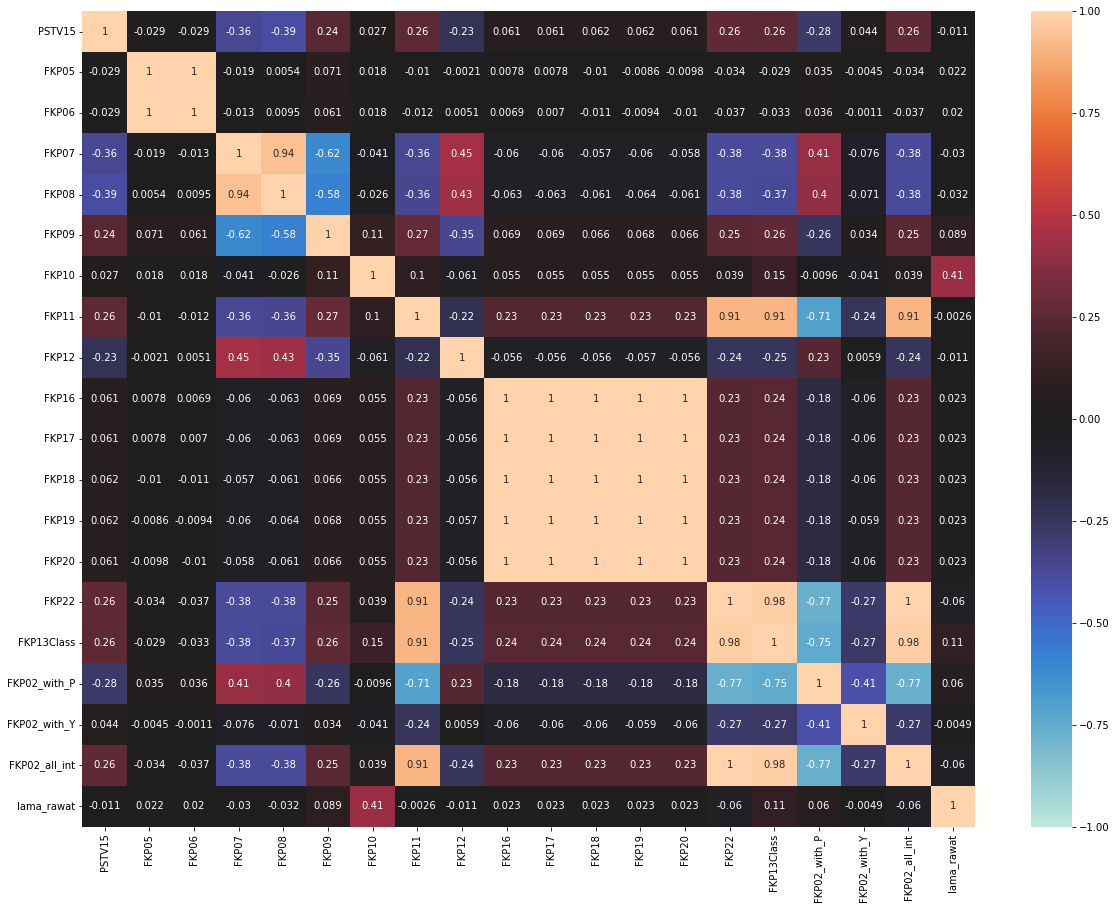

In [195]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr1, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [196]:
df_train[df_train['FKP06'].astype(str).str.slice(0,2).values != df_train['FKP05'].astype(str).values]

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,FKP02_with_P,FKP02_with_Y,FKP02_all_int,lama_rawat


In [197]:
df_train[(df_train['FKP16']!=98) & \
         (df_train['FKP17'].astype(str).str.slice(0,2).values != df_train['FKP16'].astype(str).values)]

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,FKP02_with_P,FKP02_with_Y,FKP02_all_int,lama_rawat


In [198]:
df_train.loc[:, 'FKP06'] = df_train.loc[:, 'FKP06'].astype(str).str.slice(2).values
df_train.head()

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,FKP02_with_P,FKP02_with_Y,FKP02_all_int,lama_rawat
171216,111.670555,73,73,3,1,3,1,1.0,5,Z71,98,9998,98,98,98,1,0,1,0,0,0
2253572,46.298824,35,72,9,3,2,1,1.0,5,J11,98,9998,98,98,98,1,0,1,0,0,0
1264505,704.049011,12,12,3,1,4,1,12.0,3,999,98,9998,98,98,98,2,1,0,0,1,0
3987836,106.943207,33,76,3,1,3,1,13.0,2,999,98,9998,98,98,98,2,1,0,0,1,0
2397940,3.832804,33,74,9,3,2,1,1.0,5,Z01,98,9998,98,98,98,1,0,1,0,0,0


In [199]:
df_train.loc[:, 'FKP17'] = df_train.loc[:, 'FKP17'].astype(str).str.slice(2).values
df_train.head()

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,FKP02_with_P,FKP02_with_Y,FKP02_all_int,lama_rawat
171216,111.670555,73,73,3,1,3,1,1.0,5,Z71,98,98,98,98,98,1,0,1,0,0,0
2253572,46.298824,35,72,9,3,2,1,1.0,5,J11,98,98,98,98,98,1,0,1,0,0,0
1264505,704.049011,12,12,3,1,4,1,12.0,3,999,98,98,98,98,98,2,1,0,0,1,0
3987836,106.943207,33,76,3,1,3,1,13.0,2,999,98,98,98,98,98,2,1,0,0,1,0
2397940,3.832804,33,74,9,3,2,1,1.0,5,Z01,98,98,98,98,98,1,0,1,0,0,0


In [200]:
df_test.loc[:, 'FKP06'] = df_test.loc[:, 'FKP06'].astype(str).str.slice(2).values
df_test.loc[:, 'FKP17'] = df_test.loc[:, 'FKP17'].astype(str).str.slice(2).values

df_kumpul.loc[:, 'FKP06'] = df_kumpul.loc[:, 'FKP06'].astype(str).str.slice(2).values
df_kumpul.loc[:, 'FKP17'] = df_kumpul.loc[:, 'FKP17'].astype(str).str.slice(2).values

In [201]:
df_train.loc[:, 'FKP06'] = df_train.loc[:, 'FKP06'].astype(int)
df_train.loc[:, 'FKP17'] = df_train.loc[:, 'FKP17'].astype(int)

df_test.loc[:, 'FKP06'] = df_test.loc[:, 'FKP06'].astype(int)
df_test.loc[:, 'FKP17'] = df_test.loc[:, 'FKP17'].astype(int)

df_kumpul.loc[:, 'FKP06'] = df_kumpul.loc[:, 'FKP06'].astype(int)
df_kumpul.loc[:, 'FKP17'] = df_kumpul.loc[:, 'FKP17'].astype(int)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3245518 entries, 171216 to 4055419
Data columns (total 21 columns):
 #   Column         Dtype  
---  ------         -----  
 0   PSTV15         float64
 1   FKP05          int64  
 2   FKP06          int32  
 3   FKP07          int64  
 4   FKP08          int64  
 5   FKP09          int64  
 6   FKP10          int64  
 7   FKP11          float64
 8   FKP12          int64  
 9   FKP14A         object 
 10  FKP16          int64  
 11  FKP17          int32  
 12  FKP18          int64  
 13  FKP19          int64  
 14  FKP20          int64  
 15  FKP22          int64  
 16  FKP13Class     int32  
 17  FKP02_with_P   int64  
 18  FKP02_with_Y   int64  
 19  FKP02_all_int  int64  
 20  lama_rawat     int64  
dtypes: float64(2), int32(3), int64(15), object(1)
memory usage: 507.6+ MB


In [202]:
df_train['FKP14A_letter'] = df_train['FKP14A'].str.slice(0,1).to_numpy()
df_train['FKP14A_num'] = df_train['FKP14A'].str.slice(1).to_numpy().astype(np.int64)
df_train.drop('FKP14A', axis=1, inplace=True)

df_train.head()

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,FKP02_with_P,FKP02_with_Y,FKP02_all_int,lama_rawat,FKP14A_letter,FKP14A_num
171216,111.670555,73,73,3,1,3,1,1.0,5,98,98,98,98,98,1,0,1,0,0,0,Z,71
2253572,46.298824,35,72,9,3,2,1,1.0,5,98,98,98,98,98,1,0,1,0,0,0,J,11
1264505,704.049011,12,12,3,1,4,1,12.0,3,98,98,98,98,98,2,1,0,0,1,0,9,99
3987836,106.943207,33,76,3,1,3,1,13.0,2,98,98,98,98,98,2,1,0,0,1,0,9,99
2397940,3.832804,33,74,9,3,2,1,1.0,5,98,98,98,98,98,1,0,1,0,0,0,Z,1


In [203]:
df_test['FKP14A_letter'] = df_test['FKP14A'].str.slice(0,1).to_numpy()
df_test['FKP14A_num'] = df_test['FKP14A'].str.slice(1).to_numpy().astype(np.int64)
df_test.drop('FKP14A', axis=1, inplace=True)

df_kumpul['FKP14A_letter'] = df_kumpul['FKP14A'].str.slice(0,1).to_numpy()
df_kumpul['FKP14A_num'] = df_kumpul['FKP14A'].str.slice(1).to_numpy().astype(np.int64)
df_kumpul.drop('FKP14A', axis=1, inplace=True)

In [204]:
from tqdm import tqdm

In [205]:
def pisah_kodediag(df):
    diagfktp_icd10 = []
    letters = df['FKP14A_letter'].values
    nums = df['FKP14A_num'].values
    for i in tqdm(range(df.shape[0])):
        letter = letters[i]
        num = nums[i]
        if (letter in ['A', 'B']):
            diagfktp_icd10.append('I')
        elif (letter == 'C') or (letter == 'D' and num <= 48):
            diagfktp_icd10.append('II')
        elif letter == 'D' and num >= 50:
            diagfktp_icd10.append('III')
        elif letter == 'E':
            diagfktp_icd10.append('IV')
        elif letter == 'F':
            diagfktp_icd10.append('V')
        elif letter == 'G':
            diagfktp_icd10.append('VI')
        elif letter == 'H' and num <= 59:
            diagfktp_icd10.append('VII')
        elif letter == 'H' and num >= 60:
            diagfktp_icd10.append('VIII')
        elif letter == 'I':
            diagfktp_icd10.append('IX')
        elif letter == 'J':
            diagfktp_icd10.append('X')
        elif letter == 'K':
            diagfktp_icd10.append('XI')
        elif letter == 'L':
            diagfktp_icd10.append('XII')
        elif letter == 'M':
            diagfktp_icd10.append('XIII')
        elif letter == 'N':
            diagfktp_icd10.append('XIV')
        elif letter == 'O':
            diagfktp_icd10.append('XV')
        elif letter == 'P':
            diagfktp_icd10.append('XVI')
        elif letter == 'Q':
            diagfktp_icd10.append('XVII')
        elif letter == 'R':
            diagfktp_icd10.append('XVIII')
        elif letter in ['S', 'T']:
            diagfktp_icd10.append('XIX')
        elif letter in ['V', 'X', 'Y']:
            diagfktp_icd10.append('XX')
        elif letter == 'Z':
            diagfktp_icd10.append('XXI')
        elif letter == 'U':
            diagfktp_icd10.append('XXII')
        else:
            diagfktp_icd10.append('-')
    
    return diagfktp_icd10

In [206]:
FKP14A_romawi_train = pisah_kodediag(df_train)
FKP14A_romawi_test = pisah_kodediag(df_test)
FKP14A_romawi_kumpul = pisah_kodediag(df_kumpul)

100%|████████████████████████████████████████████████████████████████████| 1014225/1014225 [00:01<00:00, 711686.50it/s]


In [207]:
df_train['FKP14A_koderomawi'] = FKP14A_romawi_train
df_test['FKP14A_koderomawi'] = FKP14A_romawi_test
df_kumpul['FKP14A_koderomawi'] = FKP14A_romawi_kumpul

In [208]:
df_train.head()

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,FKP02_with_P,FKP02_with_Y,FKP02_all_int,lama_rawat,FKP14A_letter,FKP14A_num,FKP14A_koderomawi
171216,111.670555,73,73,3,1,3,1,1.0,5,98,98,98,98,98,1,0,1,0,0,0,Z,71,XXI
2253572,46.298824,35,72,9,3,2,1,1.0,5,98,98,98,98,98,1,0,1,0,0,0,J,11,X
1264505,704.049011,12,12,3,1,4,1,12.0,3,98,98,98,98,98,2,1,0,0,1,0,9,99,-
3987836,106.943207,33,76,3,1,3,1,13.0,2,98,98,98,98,98,2,1,0,0,1,0,9,99,-
2397940,3.832804,33,74,9,3,2,1,1.0,5,98,98,98,98,98,1,0,1,0,0,0,Z,1,XXI


In [209]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3245518 entries, 171216 to 4055419
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   PSTV15             float64
 1   FKP05              int64  
 2   FKP06              int32  
 3   FKP07              int64  
 4   FKP08              int64  
 5   FKP09              int64  
 6   FKP10              int64  
 7   FKP11              float64
 8   FKP12              int64  
 9   FKP16              int64  
 10  FKP17              int32  
 11  FKP18              int64  
 12  FKP19              int64  
 13  FKP20              int64  
 14  FKP22              int64  
 15  FKP13Class         int32  
 16  FKP02_with_P       int64  
 17  FKP02_with_Y       int64  
 18  FKP02_all_int      int64  
 19  lama_rawat         int64  
 20  FKP14A_letter      object 
 21  FKP14A_num         int64  
 22  FKP14A_koderomawi  object 
dtypes: float64(2), int32(3), int64(16), object(2)
memory usage: 557.1+ MB


In [210]:
df_train['FKP20'].value_counts()

98    2941852
34     105651
28      71103
27      36785
35      28921
33      12104
38       8919
29       7442
14       7107
37       5636
39       5138
8        4244
13       3560
10       1723
36       1259
26        933
5         749
6         695
15        578
9         457
31        410
99        161
17         52
11         27
32         12
Name: FKP20, dtype: int64

In [211]:
df_train.loc[(df_train['FKP20'] == 99) & (df_train['FKP19'] == 98), 'FKP20'] = 98
df_train.loc[(df_train['FKP20'] == 99) & (df_train['FKP19'] != 98), 'FKP20'] = 34

df_test.loc[(df_test['FKP20'] == 99) & (df_test['FKP19'] == 98), 'FKP20'] = 98
df_test.loc[(df_test['FKP20'] == 99) & (df_test['FKP19'] != 98), 'FKP20'] = 34

df_kumpul.loc[(df_kumpul['FKP20'] == 99) & (df_kumpul['FKP19'] == 98), 'FKP20'] = 98
df_kumpul.loc[(df_kumpul['FKP20'] == 99) & (df_kumpul['FKP19'] != 98), 'FKP20'] = 34

In [212]:
df_train.head(3)

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,FKP02_with_P,FKP02_with_Y,FKP02_all_int,lama_rawat,FKP14A_letter,FKP14A_num,FKP14A_koderomawi
171216,111.670555,73,73,3,1,3,1,1.0,5,98,98,98,98,98,1,0,1,0,0,0,Z,71,XXI
2253572,46.298824,35,72,9,3,2,1,1.0,5,98,98,98,98,98,1,0,1,0,0,0,J,11,X
1264505,704.049011,12,12,3,1,4,1,12.0,3,98,98,98,98,98,2,1,0,0,1,0,9,99,-


In [234]:
df_train[(df_train['FKP13Class'] == 1) & (df_train['FKP02_all_int'] == 0)]

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,FKP02_with_P,FKP02_with_Y,FKP02_all_int,lama_rawat,FKP14A_letter,FKP14A_num,FKP14A_koderomawi
3447153,12.921429,63,7,3,1,4,2,1.0,3,98,98,98,98,98,1,1,1,0,0,1,E,14,IV
2652578,26.158014,35,19,9,3,2,3,1.0,4,98,98,98,98,98,1,1,1,0,0,0,E,11,IV
1357933,42.966377,33,76,9,5,8,3,7.0,2,98,98,98,98,98,1,1,1,0,0,0,I,10,IX
377819,71.225433,33,9,9,2,1,3,7.0,5,98,98,98,98,98,1,1,1,0,0,0,E,11,IV
2986405,100.226395,32,9,3,1,3,2,3.0,4,98,98,98,98,98,1,1,1,0,0,1,O,80,XV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3710641,1.680836,53,6,9,2,5,2,1.0,5,98,98,98,98,98,1,1,1,0,0,4,M,79,XIII
3791761,3.991986,52,3,3,1,4,2,3.0,2,98,98,98,98,98,1,1,1,0,0,1,O,80,XV
3596284,123.331360,53,13,3,1,4,2,1.0,2,98,98,98,98,98,1,1,1,0,0,1,N,39,XIV
3397451,317.993195,73,6,3,1,4,2,1.0,2,98,98,98,98,98,1,1,1,0,0,3,A,90,I


In [235]:
df_test[(df_test['FKP13Class'] == 1) & (df_test['FKP02_all_int'] == 0)]

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,FKP02_with_P,FKP02_with_Y,FKP02_all_int,lama_rawat,FKP14A_letter,FKP14A_num,FKP14A_koderomawi
2873049,41.390591,16,5,3,1,4,2,4.0,2,98,98,98,98,98,1,1,1,0,0,3,K,30,XI
3214485,60.825260,94,19,3,1,4,2,1.0,5,98,98,98,98,98,1,1,1,0,0,1,R,11,XVIII
1838631,40.550175,61,12,3,1,3,3,1.0,2,98,98,98,98,98,1,1,0,1,0,0,I,10,IX
2777619,2.626307,12,12,9,2,5,2,3.0,5,98,98,98,98,98,1,1,0,1,0,0,O,80,XV
403802,145.497391,73,12,3,1,4,2,4.0,4,98,98,98,98,98,1,1,1,0,0,1,A,9,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434566,146.337799,31,72,9,2,1,3,7.0,4,98,98,98,98,98,1,1,0,1,0,0,E,10,IV
2809538,1.785889,35,72,9,3,2,2,3.0,5,98,98,98,98,98,1,1,1,0,0,2,O,80,XV
3665708,5.252613,35,7,9,2,5,2,4.0,5,98,98,98,98,98,1,1,1,0,0,2,A,1,I
2094507,115.767593,53,2,9,2,1,3,7.0,1,98,98,98,98,98,1,1,1,0,0,0,E,11,IV


In [239]:
import joblib
joblib.dump(df_train, 'df_train.pkl')
joblib.dump(df_test, 'df_test.pkl')
joblib.dump(df_kumpul, 'df_kumpul.pkl')

['df_kumpul.pkl']

In [7]:
df_train = joblib.load('df_train.pkl')
df_test = joblib.load('df_test.pkl')
df_kumpul = joblib.load('df_kumpul.pkl')

df_train

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,lama_rawat,FKP14A_koderomawi
171216,111.670555,73,73,3,1,3,1,1.0,5,98,98,98,98,98,1,0,0,XXI
2253572,46.298824,35,72,9,3,2,1,1.0,5,98,98,98,98,98,1,0,0,X
1264505,704.049011,12,12,3,1,4,1,12.0,3,98,98,98,98,98,2,1,0,-
3987836,106.943207,33,76,3,1,3,1,13.0,2,98,98,98,98,98,2,1,0,-
2397940,3.832804,33,74,9,3,2,1,1.0,5,98,98,98,98,98,1,0,0,XXI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605313,98.539024,13,75,3,1,3,1,1.0,2,13,75,9,1,34,1,0,0,IX
3703884,69.019341,32,76,9,2,1,1,1.0,5,98,98,98,98,98,1,0,0,XXI
2370294,57.778748,35,17,9,3,2,1,1.0,1,98,98,98,98,98,1,0,0,XIII
303264,186.152618,18,4,3,1,4,1,13.0,4,98,98,98,98,98,2,1,0,-


In [241]:
df_train.drop('lama_rawat', axis=1, inplace=True)
df_test.drop('lama_rawat', axis=1, inplace=True)
df_kumpul.drop('lama_rawat', axis=1, inplace=True)

# Preprocessing

In [213]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, OneHotEncoder

In [242]:
X_train, y_train = df_train.drop('FKP13Class', axis=1).copy(), df_train['FKP13Class'].values
X_test, y_test = df_test.drop('FKP13Class', axis=1).copy(), df_test['FKP13Class'].values

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3245518, 21), (811380, 21), (3245518,), (811380,))

In [243]:
fkp05_cat = metadata.iloc[30:64, 1].values.astype(int)
fkp07_cat = metadata.iloc[64:73, 1].values.astype(int)
fkp08_cat = metadata.iloc[73:80, 1].values.astype(int)
fkp09_cat = metadata.iloc[80:92, 1].values.astype(int)
fkp10_cat = metadata.iloc[92:95, 1].values.astype(int)
fkp11_cat = metadata.iloc[95:123, 1].values
fkp12_cat = metadata.iloc[123:128, 1].values.astype(int)
fkp16_cat = metadata.iloc[128:163, 1].values.astype(int)
fkp16_cat[fkp16_cat == 99] = 98
fkp18_cat = metadata.iloc[163:173, 1].values.astype(int)
fkp19_cat = metadata.iloc[174:178, 1].values.astype(int)
fkp20_cat = metadata.iloc[179:219, 1].values.astype(int)
fkp20_cat = np.append(fkp20_cat, 98)
fkp22_cat = np.array([1, 2])
fkp14a_cat = np.array(['-', 'I', 'II', 'III', 'IV', 'V', 'VI',
                      'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII',
                      'XIV', 'XV', 'XVI', 'XVII', 'XVIII', 'XIX', 'XX',
                      'XXI', 'XXII'])

In [245]:
X_train.drop(['PSTV15', 'FKP14A_letter',
                           'FKP14A_num', 'FKP06', 'FKP17'], axis=1).columns.values

array(['FKP05', 'FKP07', 'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12',
       'FKP16', 'FKP18', 'FKP19', 'FKP20', 'FKP22', 'FKP02_with_P',
       'FKP02_with_Y', 'FKP02_all_int', 'FKP14A_koderomawi'], dtype=object)

In [246]:
onehot_enc = OneHotEncoder(categories=[fkp05_cat, fkp07_cat, fkp08_cat, fkp09_cat,
                                      fkp10_cat, fkp11_cat, fkp12_cat, fkp16_cat,
                                      fkp18_cat, fkp19_cat, fkp20_cat, fkp22_cat,
                                      fkp14a_cat])
onehot_col = X_train.drop(['PSTV15', 'FKP14A_letter',
                           'FKP14A_num', 'FKP06', 'FKP17', 'FKP02_with_P',
                           'FKP02_with_Y', 'FKP02_all_int'], axis=1).columns.values

In [247]:
onehot_enc2 = OneHotEncoder()

onehot_col2 = np.array(['FKP06', 'FKP17', 'FKP14A_letter',
                          'FKP14A_num'])

In [248]:
from sklearn.compose import ColumnTransformer

In [249]:
preprocess = ColumnTransformer([
    ('cat', onehot_enc, onehot_col),
    ('cat2', onehot_enc2, onehot_col2)
], remainder='passthrough')

preprocess.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 OneHotEncoder(categories=[array([11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 31, 32, 33, 34, 35, 36, 51,
       52, 53, 61, 62, 63, 64, 65, 71, 72, 73, 74, 75, 76, 81, 82, 91, 94]),
                                                           array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                                           array([1, 2, 3, 4, 5, 6, 7]),
                                                           array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
                                                           array([1, 2, 3]),
                                                           array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13....
                                                           array(['-', 'I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X',
       'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI', 'XVII', 'XVIII', 'XIX',
       'XX', 'XXI', 'XXII'], dtype='<U5')]),
                                 array(['FKP05', 'FKP07', 'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12',
       'FKP16', 'FKP18', 'FKP19', 'FKP20', 'FKP22', 'FKP14A_koderomawi'],
      dtype=object)),
                                ('cat2', OneHotEncoder(),
                                 array(['FKP06', 'FKP17', 'FKP14A_letter', 'FKP14A_num'], dtype='<U13'))])

In [250]:
X_train_prepared = preprocess.transform(X_train)
X_test_prepared = preprocess.transform(X_test)
X_kumpul = preprocess.transform(df_kumpul)

X_train_prepared.shape

(3245518, 426)

# Modelling

## ANN (ini gausa diliat, lgsg ke XGB aja)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/BDC Satria Data 2022/submission.csv')
submission

,Unnamed: 0,FKP02,Status
0,1,954386050,NaN
1,2,774246805,NaN
2,3,1202010273,NaN
3,4,1286640248,NaN
4,5,1285179242,NaN
...,...,...,...
1014220,1014221,248870919P000406,NaN
1014221,1014222,116000620P000034,NaN
1014222,1014223,160421019P000631,NaN
1014223,1014224,332670919P000083,NaN


In [ ]:
submission['Status'] = y_pred_kumpul
submission

,Unnamed: 0,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


In [ ]:
submission.rename({'""': ''}, axis=1, inplace=True)
submission

,,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


In [ ]:
submission

,,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


In [ ]:
submission[''] = submission[''].astype(str)
submission['FKP02'] = submission['FKP02'].astype(str)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014225 entries, 0 to 1014224
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0           1014225 non-null  object
 1   FKP02   1014225 non-null  object
 2   Status  1014225 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 23.2+ MB


In [ ]:
import csv

In [ ]:
submission.to_csv('submission.csv', index=False, quotechar='"', quoting=csv.QUOTE_NONNUMERIC)

## XGB

In [222]:
import xgboost as xgb
from sklearn.metrics import f1_score

In [1]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', 
                            verbosity=2, n_jobs=-1, tree_method='hist')

params = {'learning_rate': Real(1e-2, 1, 'log-uniform'),
         'max_depth': Integer(6, 64),
         'subsample': Real(0.5, 1),
         'colsample_bytree': Real(0.5, 1),
         'reg_alpha': Real(1e-2, 10, 'log-uniform'),
         'reg_lambda': Real(1e-2, 10, 'log-uniform'),
         'gamma': Real(0, 10),
         'min_child_weight': Integer(1, 10)}

search = BayesSearchCV(xgb_clf, params, scoring='f1', cv=3, 
                       verbose=10, n_jobs=-1, n_iter=50,
                       return_train_score=True)

NameError: name 'xgb' is not defined

In [ ]:
search.fit(X_train_prepared, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [55]:
search.best_params_, search.best_score_

(OrderedDict([('colsample_bytree', 0.9582289197731735),
              ('gamma', 0.8402290540773223),
              ('learning_rate', 0.4170678075604692),
              ('max_depth', 38),
              ('min_child_weight', 1),
              ('reg_alpha', 0.042089780419171295),
              ('reg_lambda', 0.026024196455210945),
              ('subsample', 1.0)]),
 0.9967429679287827)

In [223]:
def xgb_f1(y, t, threshold=0.5):
    t = t.get_label()
    y_bin = (y >= threshold).astype(int) # works for both type(y) == <class 'numpy.ndarray'> and type(y) == <class 'pandas.core.series.Series'>
    return 'f1', f1_score(t,y_bin)

In [265]:
es = xgb.callback.EarlyStopping(rounds=100, metric_name='f1', 
                                data_name='validation_0', 
                                maximize=True,
                                save_best=True)

xgb_clf = xgb.XGBClassifier(n_estimators=1000, colsample_bytree=0.9582289197731735,
                            gamma=0.8402290540773223, learning_rate=0.04170678075604692, 
                            max_depth=38, reg_alpha=0.042089780419171295, 
                            reg_lambda=0.026024196455210945, subsample=1.0, 
                            min_child_weight=1,
                            callbacks=[es], objective='binary:logistic', 
                            verbosity=2, n_jobs=-1, tree_method='hist')

In [267]:
xgb_clf.fit(X_train_prepared, y_train, eval_set=[(X_test_prepared, y_test)],
            eval_metric=xgb_f1, sample_weight=X_train['PSTV15'].values,
            sample_weight_eval_set=[X_test['PSTV15'].values])

[00:41:30] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[00:41:30] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[00:41:30] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/data/simple_dmatrix.cc:102: Generating new Gradient Index.
[0]	validation_0-logloss:0.65242	validation_0-f1:0.99760
[00:41:35] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[1]	validation_0-logloss:0.61495	validation_0-f1:0.99762
[00:41:36] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater gr

[31]	validation_0-logloss:0.14126	validation_0-f1:0.99780
[00:42:08] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[32]	validation_0-logloss:0.13519	validation_0-f1:0.99779
[00:42:09] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[33]	validation_0-logloss:0.12940	validation_0-f1:0.99780
[00:42:10] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[34]	validation_0-logloss:0.12388	validation_0-f1:0.99780
[00:42:11] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.


KeyboardInterrupt: 

In [226]:
xgb_clf.best_iteration

87

In [227]:
y_pred = xgb_clf.predict(X_test_prepared)

In [228]:
f1_score(y_test, y_pred)

0.9979936571406447

In [229]:
y_pred_proba = xgb_clf.predict_proba(X_test_prepared)
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba

array([0.01255391, 0.01255391, 0.01255391, ..., 0.98744607, 0.01255391,
       0.98744607], dtype=float32)

In [230]:
from sklearn.metrics import precision_recall_curve

prec, rec, th = precision_recall_curve(y_test, y_pred_proba)

max_f1 = 0
max_th = 0
for i in range(len(th)):
  f1 = 2/((1/prec[i])+(1/rec[i]))
  if max_f1 < f1:
    max_f1 = f1
    max_th = th[i]
max_f1

0.9980025799276

In [231]:
f1_score(y_test, (y_pred_proba >= max_th).astype(int))

0.9980025799276002

In [232]:
xgb_clf.save_model('xgb_99_800.json')

In [342]:
feature_imp = pd.DataFrame(xgb_clf.feature_importances_).sort_values(0)
feature_imp

,0
187,0.000000
157,0.000000
158,0.000000
159,0.000000
160,0.000000
...,...
62,0.002857
63,0.010451
295,0.277219
188,0.315198


In [348]:
X_train_prepared_reduce = X_train_prepared[:, feature_imp[feature_imp[0] != 0].index]
X_test_prepared_reduce = X_test_prepared[:, feature_imp[feature_imp[0] != 0].index]

X_train_prepared_reduce

<3245518x200 sparse matrix of type '<class 'numpy.float64'>'
	with 44441115 stored elements in Compressed Sparse Row format>

In [349]:
X_test_prepared_reduce

<811380x200 sparse matrix of type '<class 'numpy.float64'>'
	with 11110691 stored elements in Compressed Sparse Row format>

In [251]:
es = xgb.callback.EarlyStopping(rounds=100, metric_name='f1', 
                                data_name='validation_0', 
                                maximize=True,
                                save_best=True)

xgb_clf = xgb.XGBClassifier(n_estimators=1000, colsample_bytree=0.9582289197731735,
                            gamma=0.8402290540773223, learning_rate=0.04170678075604692, 
                            max_depth=38, reg_alpha=0.042089780419171295, 
                            reg_lambda=0.026024196455210945, subsample=1.0, 
                            min_child_weight=1,
                            callbacks=[es], objective='binary:logistic', 
                            verbosity=2, n_jobs=-1, tree_method='hist')

xgb_clf.fit(X_train_prepared, y_train, eval_set=[(X_test_prepared, y_test)],
            eval_metric=xgb_f1)

[00:33:10] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[00:33:10] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[00:33:10] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/data/simple_dmatrix.cc:102: Generating new Gradient Index.
[0]	validation_0-logloss:0.65249	validation_0-f1:0.99779
[00:33:13] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[1]	validation_0-logloss:0.61508	validation_0-f1:0.99784
[00:33:14] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater gr

[31]	validation_0-logloss:0.14204	validation_0-f1:0.99796
[00:33:40] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[32]	validation_0-logloss:0.13597	validation_0-f1:0.99797
[00:33:41] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[33]	validation_0-logloss:0.13018	validation_0-f1:0.99797
[00:33:42] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[34]	validation_0-logloss:0.12466	validation_0-f1:0.99796
[00:33:42] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.


[64]	validation_0-logloss:0.03676	validation_0-f1:0.99800
[00:34:07] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[65]	validation_0-logloss:0.03539	validation_0-f1:0.99800
[00:34:08] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[66]	validation_0-logloss:0.03407	validation_0-f1:0.99800
[00:34:09] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[67]	validation_0-logloss:0.03282	validation_0-f1:0.99800
[00:34:09] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.


[97]	validation_0-logloss:0.01202	validation_0-f1:0.99800
[00:34:39] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[98]	validation_0-logloss:0.01168	validation_0-f1:0.99800
[00:34:39] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[99]	validation_0-logloss:0.01136	validation_0-f1:0.99800
[00:34:40] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[100]	validation_0-logloss:0.01105	validation_0-f1:0.99799
[00:34:41] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.

[130]	validation_0-logloss:0.00590	validation_0-f1:0.99799
[00:35:05] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[131]	validation_0-logloss:0.00582	validation_0-f1:0.99799
[00:35:06] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[132]	validation_0-logloss:0.00574	validation_0-f1:0.99799
[00:35:07] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[133]	validation_0-logloss:0.00566	validation_0-f1:0.99799
[00:35:08] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmak

[163]	validation_0-logloss:0.00437	validation_0-f1:0.99800
[00:35:33] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[164]	validation_0-logloss:0.00435	validation_0-f1:0.99800
[00:35:34] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[165]	validation_0-logloss:0.00433	validation_0-f1:0.99800
[00:35:35] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[166]	validation_0-logloss:0.00431	validation_0-f1:0.99800
[00:35:36] INFO: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmak

XGBClassifier(base_score=0.5, booster='gbtree',
              callbacks=[<xgboost.callback.EarlyStopping object at 0x000001E1E48301F0>],
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9582289197731735, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.8402290540773223, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.04170678075604692, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=38, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0.042089780419171295,
              reg_lambda=0.026024196455210945, ...)

In [252]:
y_pred = xgb_clf.predict(X_test_prepared)
f1_score(y_test, y_pred)

0.9980060153922238

In [278]:
y_pred_proba = xgb_clf.predict_proba(X_test_prepared)
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba

array([0.02551644, 0.02551644, 0.02551644, ..., 0.97448355, 0.02551644,
       0.97448355], dtype=float32)

In [293]:
from sklearn.metrics import precision_recall_curve

prec, rec, th = precision_recall_curve(y_test, y_pred_proba)

max_f1 = 0
max_th = 0
for i in range(len(th)):
  f1 = 2/((1/prec[i])+(1/rec[i]))
  if max_f1 < f1:
    max_f1 = f1
    max_th = th[i]
max_f1

0.9980128242361518

In [302]:
y_pred_kumpul_proba = xgb_clf.predict_proba(X_kumpul)[:, 1]
y_pred_kumpul = (y_pred_kumpul_proba >= max_th).astype(int)
y_pred_kumpul

array([1, 1, 1, ..., 0, 0, 0])

In [303]:
submission = pd.read_csv('submission.csv')
submission

,Unnamed: 0,FKP02,Status
0,1,954386050,NaN
1,2,774246805,NaN
2,3,1202010273,NaN
3,4,1286640248,NaN
4,5,1285179242,NaN
...,...,...,...
1014220,1014221,248870919P000406,NaN
1014221,1014222,116000620P000034,NaN
1014222,1014223,160421019P000631,NaN
1014223,1014224,332670919P000083,NaN


In [304]:
submission['Status'] = y_pred_kumpul
submission

,Unnamed: 0,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


In [306]:
submission.rename({'Unnamed: 0': ''}, axis=1, inplace=True)
submission

,,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


In [307]:
submission[''] = submission[''].astype(str)
submission['FKP02'] = submission['FKP02'].astype(str)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014225 entries, 0 to 1014224
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0           1014225 non-null  object
 1   FKP02   1014225 non-null  object
 2   Status  1014225 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 19.3+ MB


In [322]:
submission[submission['Status'] == 1]

,,FKP02,Status
0,1,954386050,1
1,2,774246805,1
2,3,1202010273,1
3,4,1286640248,1
4,5,1285179242,1
...,...,...,...
1007481,1007482,105671220P000440,1
1007845,1007846,384831019P000751,1
1013252,1013253,192840419Y000281,1
1013404,1013405,311380819P000867,1


In [312]:
a = pd.read_csv('submission(1).csv')

In [321]:
a[a['Status'] == 0]

,Unnamed: 0,FKP02,Status
345912,345913,104201019P000125,0
345913,345914,49120919P000545,0
345914,345915,401831019Y000684,0
345915,345916,367030419P000024,0
345916,345917,367030719P000185,0
...,...,...,...
1014220,1014221,248870919P000406,0
1014221,1014222,116000620P000034,0
1014222,1014223,160421019P000631,0
1014223,1014224,332670919P000083,0


In [292]:
df_test[(y_pred != y_test) & (df_test['FKP02_all_int'] == 0)]

,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP16,FKP17,FKP18,FKP19,FKP20,FKP22,FKP13Class,FKP02_with_P,FKP02_with_Y,FKP02_all_int,FKP14A_letter,FKP14A_num,FKP14A_koderomawi
1061610,48.008884,33,19,9,5,8,3,7.0,5,98,98,98,98,98,1,1,1,0,0,E,11,IV
917586,21.955923,61,7,3,1,4,3,1.0,4,98,98,98,98,98,1,1,1,0,0,E,11,IV
759742,9.034495,33,76,9,5,8,3,7.0,4,98,98,98,98,98,1,1,1,0,0,E,10,IV
1244507,4.727352,33,21,9,3,2,3,1.0,2,98,98,98,98,98,1,1,1,0,0,E,11,IV
1203642,17.969698,35,14,9,3,2,3,7.0,4,98,98,98,98,98,1,1,1,0,0,E,11,IV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734661,35.297562,33,9,9,5,8,3,7.0,1,98,98,98,98,98,1,1,1,0,0,E,14,IV
2411352,54.206970,33,19,9,5,8,3,7.0,4,98,98,98,98,98,1,1,1,0,0,E,11,IV
3229676,1.050523,35,4,9,5,8,3,7.0,1,98,98,98,98,98,1,1,1,0,0,E,11,IV
3389558,187.623352,32,6,3,1,4,2,4.0,2,98,98,98,98,98,1,0,1,0,0,B,19,I


In [255]:
xgb_clf.save_model('xgb_99_801.json')

In [276]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.load_model('xgb_99_801.json')

In [277]:
f1_score(y_test, xgb_clf.predict(X_test_prepared))

0.9980060153922238

## RF

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_clf = RandomForestClassifier(n_jobs=-1, verbose=10)
rf_clf.fit(X_train_prepared, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100

building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.3min


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 13.5min


building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 16.4min


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 19.5min


building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 22.8min


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 26.7min


building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 31.3min


building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 35.3min


building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 40.7min


building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 45.2min


building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 49.1min finished


RandomForestClassifier(n_jobs=-1, verbose=10)

In [40]:
from sklearn.metrics import f1_score
y_pred_rf = rf_clf.predict(X_test_prepared)
f1_score(y_test, y_pred_rf)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.6s finished


0.9966585432374652

# CatBoost

In [62]:
from catboost import CatBoostClassifier

In [66]:
cb = CatBoostClassifier(eval_metric='F1')
cb.fit(X_train_prepared, y_train, eval_set=[(X_test_prepared, y_test)],
      verbose=2)

Learning rate set to 0.233451
0:	learn: 0.9965196	test: 0.9964940	best: 0.9964940 (0)	total: 1.53s	remaining: 25m 29s
2:	learn: 0.9966707	test: 0.9966539	best: 0.9966539 (1)	total: 4.49s	remaining: 24m 50s
4:	learn: 0.9966707	test: 0.9966539	best: 0.9966539 (1)	total: 6.11s	remaining: 20m 16s
6:	learn: 0.9966707	test: 0.9966539	best: 0.9966539 (1)	total: 7.92s	remaining: 18m 43s
8:	learn: 0.9966707	test: 0.9966539	best: 0.9966539 (1)	total: 9.99s	remaining: 18m 20s
10:	learn: 0.9966707	test: 0.9966539	best: 0.9966539 (1)	total: 11.6s	remaining: 17m 21s
12:	learn: 0.9966707	test: 0.9966539	best: 0.9966539 (1)	total: 13s	remaining: 16m 29s
14:	learn: 0.9966707	test: 0.9966539	best: 0.9966539 (1)	total: 14.5s	remaining: 15m 53s
16:	learn: 0.9966707	test: 0.9966539	best: 0.9966539 (1)	total: 16.1s	remaining: 15m 33s
18:	learn: 0.9966707	test: 0.9966539	best: 0.9966539 (1)	total: 17.7s	remaining: 15m 12s
20:	learn: 0.9966707	test: 0.9966539	best: 0.9966539 (1)	total: 19.2s	remaining: 14m 55

182:	learn: 0.9967479	test: 0.9967055	best: 0.9967055 (75)	total: 3m 15s	remaining: 14m 33s
184:	learn: 0.9967479	test: 0.9967055	best: 0.9967055 (75)	total: 3m 17s	remaining: 14m 30s
186:	learn: 0.9967479	test: 0.9967055	best: 0.9967055 (75)	total: 3m 19s	remaining: 14m 29s
188:	learn: 0.9967479	test: 0.9967055	best: 0.9967055 (75)	total: 3m 22s	remaining: 14m 27s
190:	learn: 0.9967479	test: 0.9967055	best: 0.9967055 (75)	total: 3m 24s	remaining: 14m 24s
192:	learn: 0.9967479	test: 0.9967055	best: 0.9967055 (75)	total: 3m 25s	remaining: 14m 20s
194:	learn: 0.9967479	test: 0.9967055	best: 0.9967055 (75)	total: 3m 27s	remaining: 14m 16s
196:	learn: 0.9967479	test: 0.9967055	best: 0.9967055 (75)	total: 3m 29s	remaining: 14m 12s
198:	learn: 0.9967479	test: 0.9967055	best: 0.9967055 (75)	total: 3m 30s	remaining: 14m 7s
200:	learn: 0.9967479	test: 0.9967055	best: 0.9967055 (75)	total: 3m 32s	remaining: 14m 3s
202:	learn: 0.9967479	test: 0.9967055	best: 0.9967055 (75)	total: 3m 33s	remaining

KeyboardInterrupt: 